In [1]:
!pwd

/home/kornilova/Dropbox/tensorFlow/pokemon/spb-tf20170205


In [2]:
from copy import deepcopy

In [3]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from skimage.filters.rank import median
from skimage.morphology import disk

In [6]:
import skimage
import skimage.io
import skimage.filters
import skimage.transform
import skimage.feature
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy.linalg as sla

In [7]:
%matplotlib inline

In [8]:
from keras.models import load_model

In [9]:
from keras.layers import Dense, Activation, Flatten, Input, Dropout, GlobalAveragePooling2D
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.models import Model, Sequential

In [10]:
from keras.applications import ResNet50 # resnet50

In [11]:
input_tensor = Input(shape=(224, 224, 3))
resnet = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [12]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

In [13]:
%%time
faces = list()
paths = list()
origin_faces = list()
for path in os.listdir('faces/out'):
    paths.append(path)
    img = skimage.io.imread('faces/out/' + path)
    origin_faces.append(img)
    img = skimage.color.rgb2gray(img)
    img = skimage.color.gray2rgb(img)
    faces.append(img)
data = np.array(faces).astype(np.float64)
data = preprocess_input(data)
faces_len = len(data)
prediction_faces = resnet.predict(data).reshape(faces_len, 2048)

CPU times: user 7min 21s, sys: 21.1 s, total: 7min 42s
Wall time: 4min 28s


In [14]:
%%time
pokemons = list()
origin_pokemons = list()
pokepaths = list()
dir_ = 'pokefaces'
for path in os.listdir(dir_):
    path = os.path.join(dir_, path)
    if '.png' not in path:
        continue
    pokepaths.append(path)
    pokeimg = skimage.io.imread(path)
    origin_pokemons.append(skimage.io.imread(path))
    pokeimg = skimage.transform.resize(pokeimg, (224, 224, 3))
    pokeimg = skimage.color.rgb2gray(pokeimg)
    pokeimg = skimage.color.gray2rgb(pokeimg)
    pokemons.append(pokeimg)
data = np.array(pokemons).astype(np.float64)
data = preprocess_input(data)
poke_len = len(data)
prediction_poke = resnet.predict(data).reshape(poke_len, 2048)

CPU times: user 1min 16s, sys: 4.2 s, total: 1min 20s
Wall time: 42.5 s


In [15]:
distances = np.zeros((faces_len, poke_len))
for face_idx, face in enumerate(prediction_faces):
    for poke_idx, poke in enumerate(prediction_poke):
        distances[face_idx, poke_idx] = np.dot(face, poke) / sla.norm(poke) / sla.norm(face)

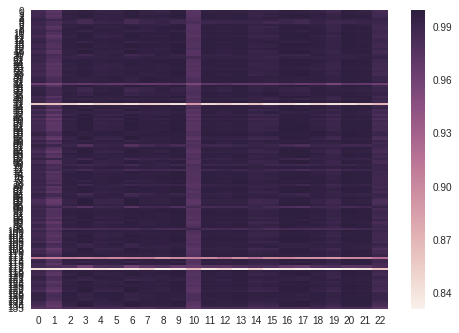

In [18]:
import seaborn as sns
sns.heatmap(distances)

In [19]:
from collections import Counter

In [22]:
image_pairs

NameError: name 'image_pairs' is not defined

In [20]:
np.argsort(distances[10])[::-1]

array([20,  9, 16, 17, 21, 13, 11,  8, 18,  3,  6,  7,  5, 12,  2,  4, 15,
       19, 14,  0, 22,  1, 10])

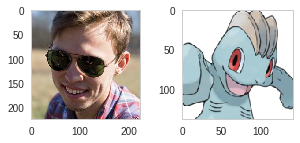

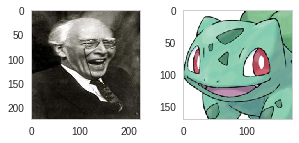

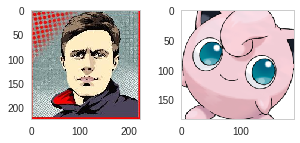

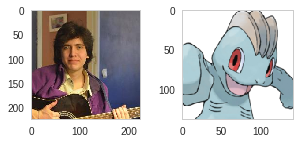

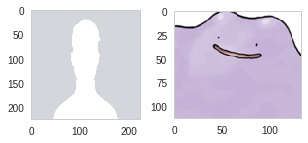

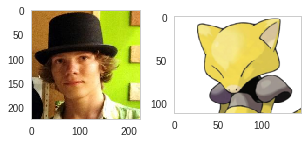

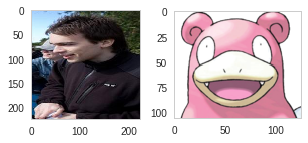

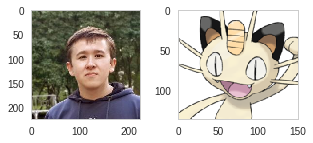

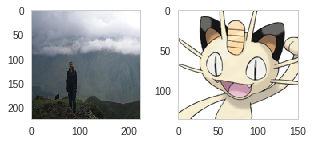

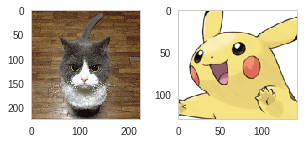

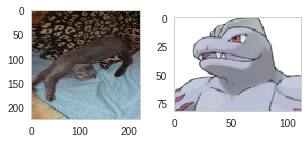

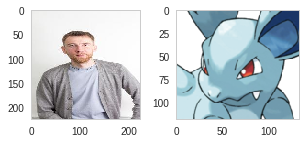

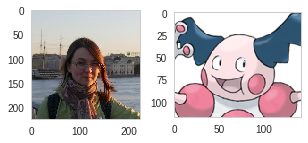

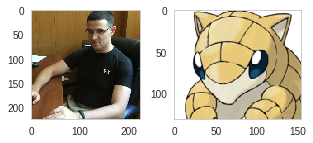

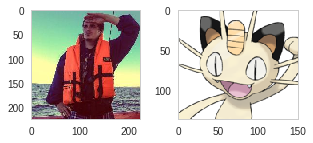

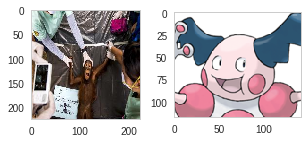

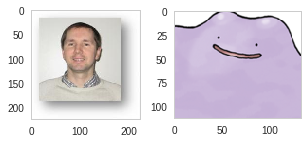

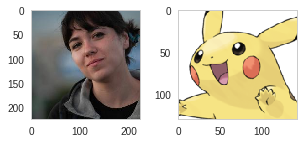

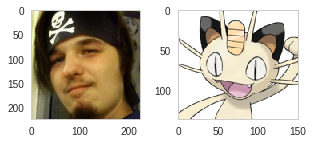

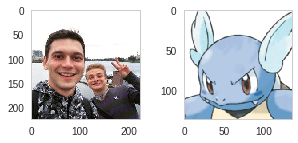

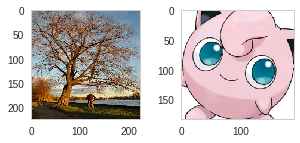

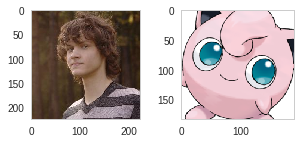

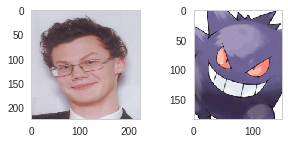

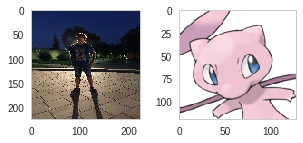

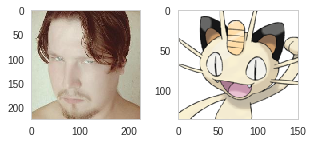

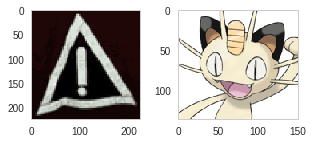

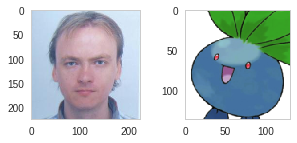

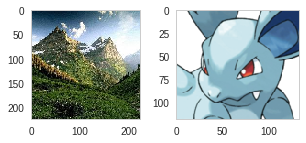

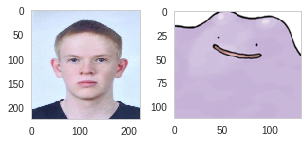

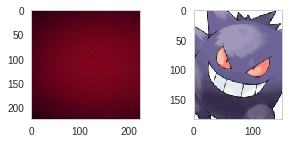

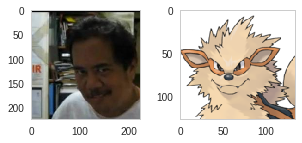

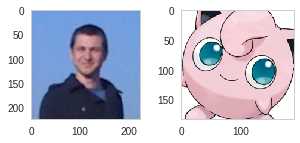

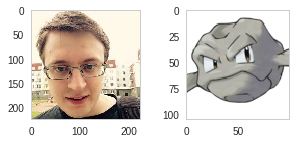

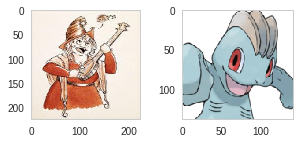

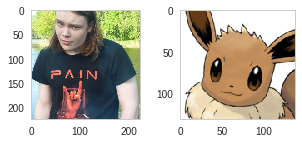

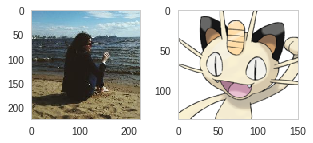

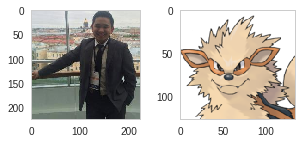

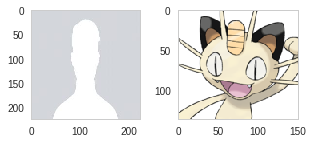

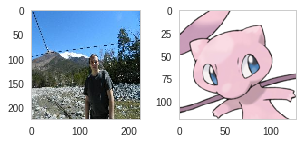

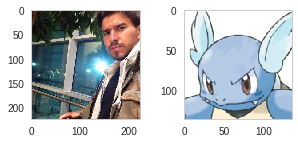

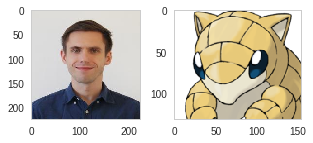

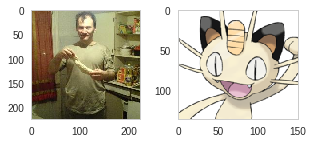

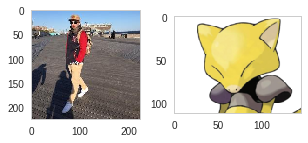

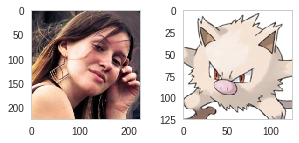

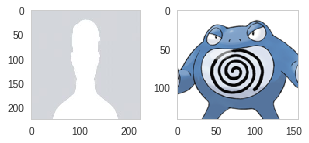

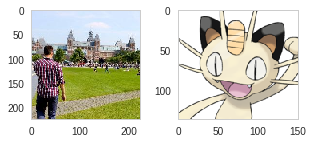

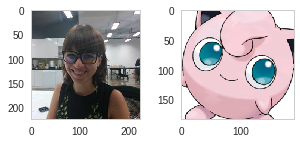

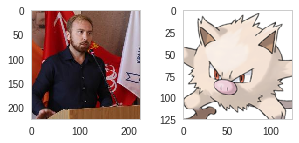

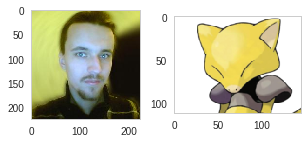

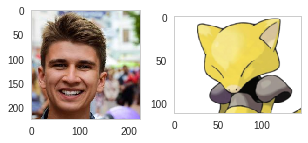

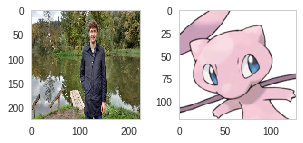

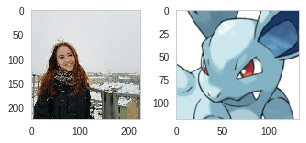

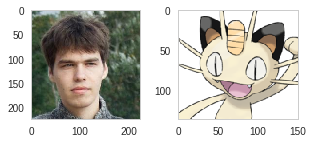

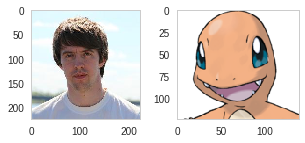

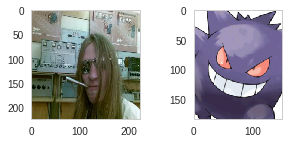

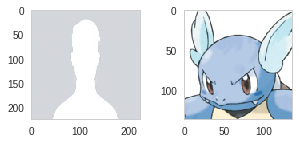

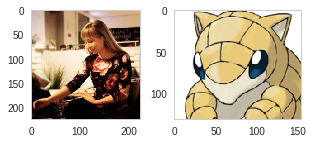

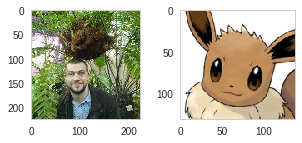

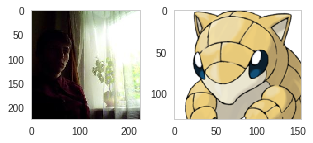

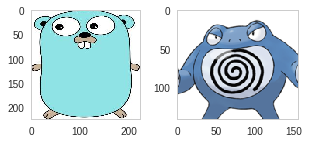

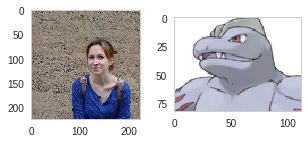

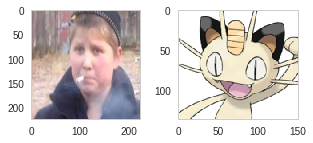

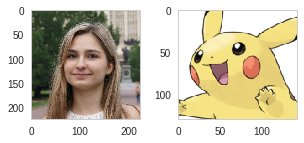

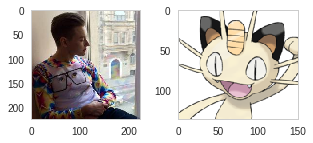

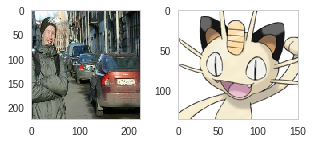

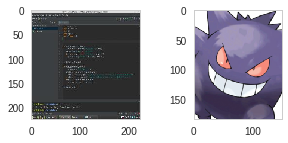

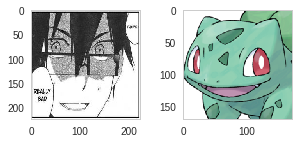

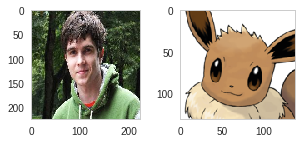

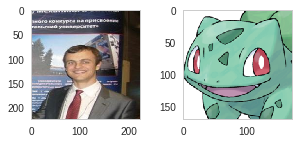

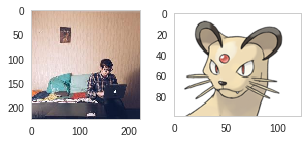

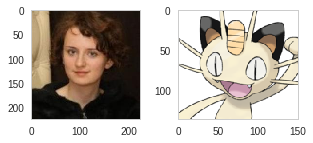

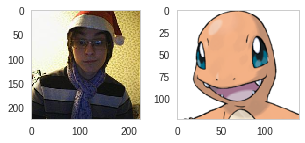

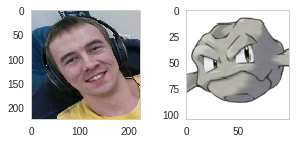

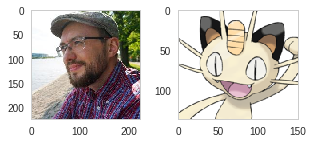

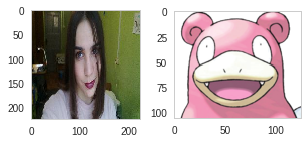

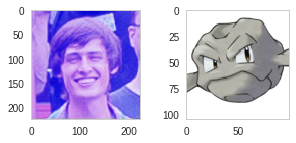

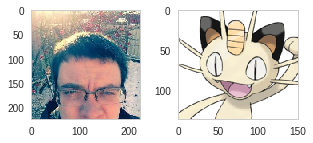

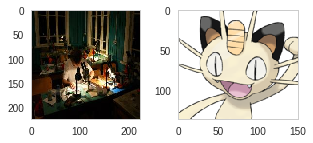

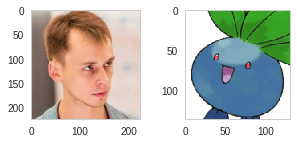

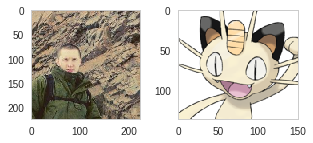

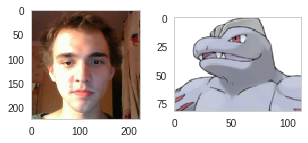

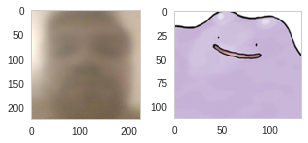

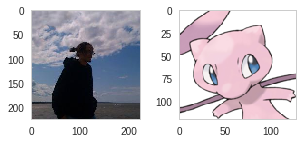

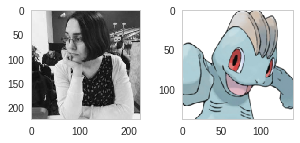

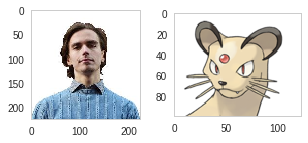

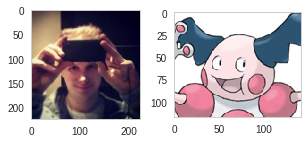

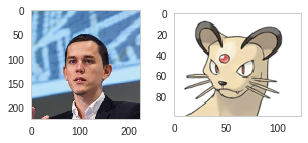

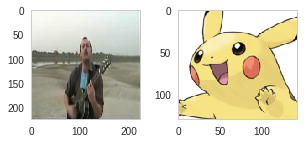

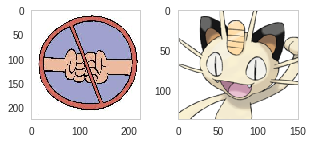

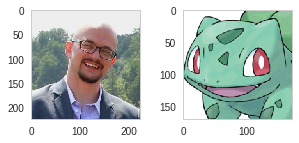

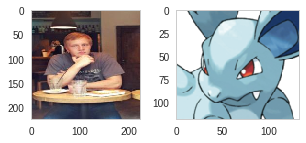

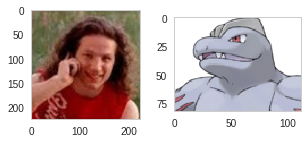

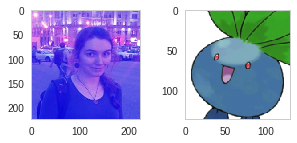

In [21]:
#plt.subplots(figsize=(12, face_len * 4))
sns.set_style("whitegrid", {'axes.grid' : False})
poke_cnt = Counter()
image_pairs = []
for idx in range(faces_len):
    priority = np.argsort(distances[idx])[::-1]
    for i, p in enumerate(priority):
        if poke_cnt[p] >=5:
            continue
        else:
            poke_cnt[p] += 1
            poke_idx = p
            break
    image_pairs.append((idx, poke_idx))
    
np.random.shuffle(image_pairs)
for idx, poke_idx in image_pairs:   
    plt.figure(figsize=(5, 2))
    plt.subplot(121)
    plt.imshow(origin_faces[idx])
    plt.subplot(122)
    plt.imshow(origin_pokemons[poke_idx])
    plt.show()

In [451]:
poke_cnt

Counter({0: 5,
         1: 5,
         2: 5,
         3: 5,
         4: 5,
         5: 5,
         6: 5,
         7: 5,
         8: 5,
         9: 5,
         10: 5,
         12: 5,
         13: 5,
         14: 4,
         15: 5,
         17: 5,
         18: 5,
         20: 5,
         21: 5,
         22: 5,
         23: 2,
         24: 5,
         25: 5,
         26: 5,
         27: 1,
         29: 5,
         30: 2,
         31: 5,
         32: 1,
         33: 1,
         34: 5})

In [22]:
hist = plt.hist(predicted, bins=poke_len)

NameError: name 'predicted' is not defined

In [231]:
np.argmax(hist[0])

13

In [77]:
np.argmax(hist[0])

87

In [65]:
np.where(hist[0] == 18)

(array([21]),)

In [37]:
np.dot(prediction_faces[0], prediction_poke[0]) / sla.norm(prediction_faces[0]) / sla.norm(prediction_poke[0])

0.97896838

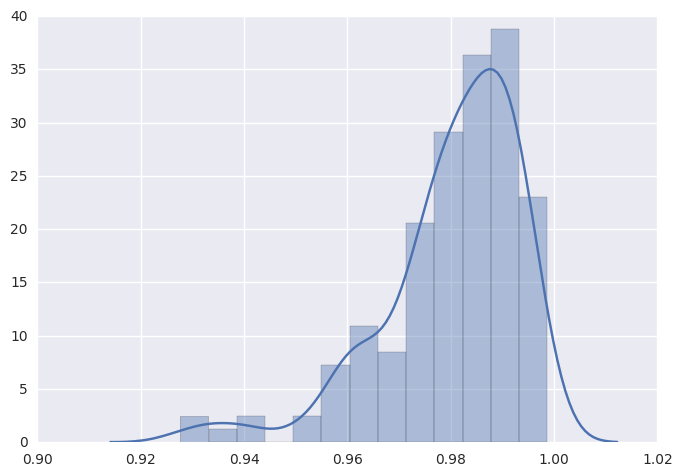

In [39]:
pface = prediction_faces[0]
faces_dist = []
for face in prediction_poke:
    dist = np.dot(pface, face) / sla.norm(pface) / sla.norm(face)
    faces_dist.append(dist)
sns.distplot(faces_dist)

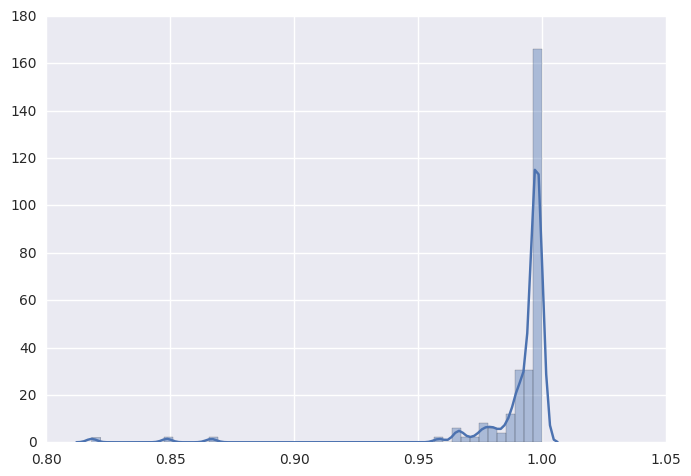

In [40]:
pface = prediction_faces[0]
faces_dist = []
for face in prediction_faces:
    dist = np.dot(pface, face) / sla.norm(pface) / sla.norm(face)
    faces_dist.append(dist)
sns.distplot(faces_dist)

In [25]:
import seaborn as sns

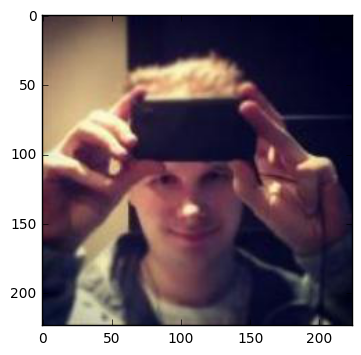

In [18]:
plt.imshow(faces[0])